# 2D Canny edges

In [129]:
from PIL import Image
import numpy as np
from numpy import fft
from scipy import special, signal, ndimage
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (14, 8)

In [130]:
cat = Image.open('cute.jpg').convert('L')
cat_data = np.array(cat.getdata()).reshape(cat.size[::-1]).astype('float32')
cat_data /= cat_data.max()

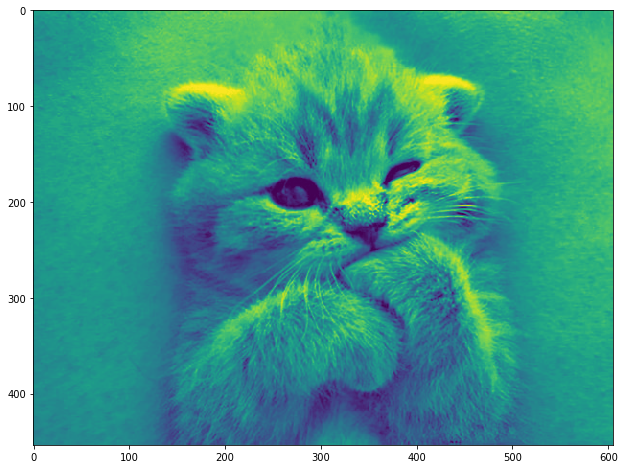

In [131]:
plt.imshow(cat_data)
plt.show()

In [140]:
p = signal.gaussian(15, 1.5)
G = p[:,None] * p[None,:]

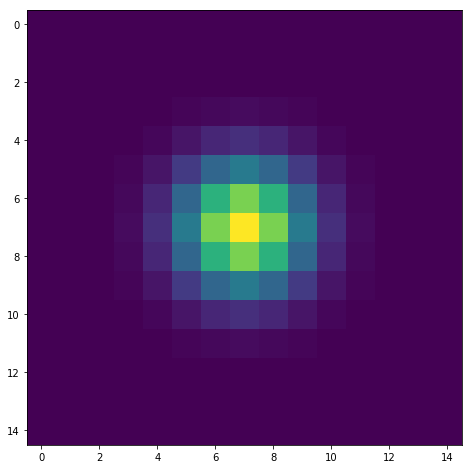

In [141]:
plt.imshow(G)
plt.show()

In [142]:
copy_cat = signal.convolve(cat_data, G, mode='valid')

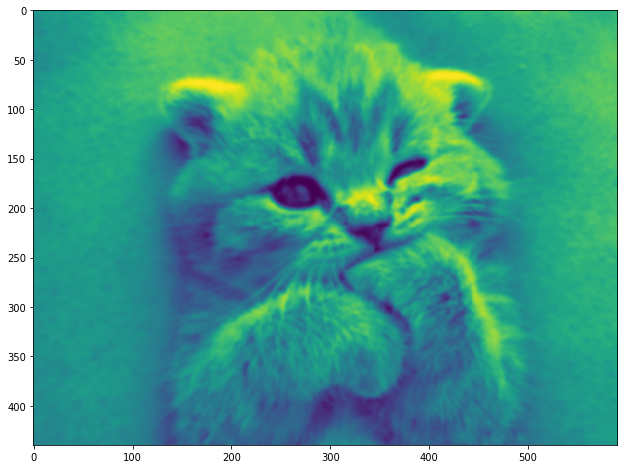

In [143]:
plt.imshow(copy_cat)
plt.show()

In [144]:
sobel_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

In [145]:
sobel_kernel.T

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [146]:
cat_y = signal.convolve(copy_cat, sobel_kernel, mode='valid')
cat_x = signal.convolve(copy_cat, sobel_kernel.T, mode='valid')

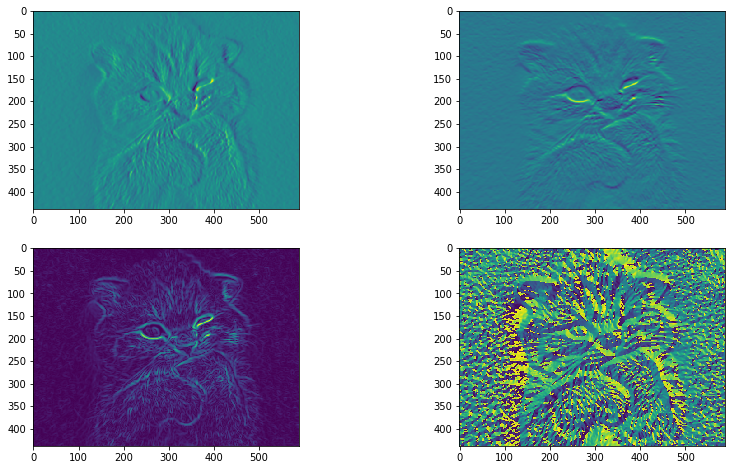

In [147]:
ax1 = plt.subplot('221')
ax1.imshow(cat_x)
ax2 = plt.subplot('222')
ax2.imshow(cat_y)
ax3 = plt.subplot('223')
ax3.imshow(np.sqrt(cat_x**2 + cat_y**2))
ax4 = plt.subplot('224')
ax4.imshow(np.arctan2(cat_y, cat_x))
plt.show()